In [1]:
import numpy as np
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
def RosenbrockFunction(vertexs):
    if len(vertexs.shape)==1:
        x,y=vertexs
    else:
        x=vertexs[:,0]
        y=vertexs[:,1]
    return (1-x)**2+100*(y-x**2)**2

In [3]:
def HimmelblauFunction(vertexs):
    if len(vertexs.shape)==1:
        x,y=vertexs
    else:
        x=vertexs[:,0]
        y=vertexs[:,1]
    return (x**2+y-11)**2+(x+y**2-7)**2

In [4]:
def NelderMeadMethod(func,vertexs,alpha=1,beta=2,gamma=0.5,sigma=0.5):
    '''
    func: Target Function.
    alpha: the coefficient of reﬂection.
    beta: the expansion coefficient.
    gamma: the compression coefficient.
    sigma: the shrink coefficient
    '''
    f=func(vertexs)
    n,_=vertexs.shape
    #1. Order f(x_i,y_i)
    vertexs_index = np.argsort(f)
    vertexs=vertexs[vertexs_index,:]
    f=f[vertexs_index]
    #2. Calculate m, the centroid of n best vertices
    m=np.mean(vertexs[:-1,:],axis=0)
    #3. Reflection
    xk=m+alpha*(m-vertexs[-1,:])
    fxk=func(xk)
    if fxk>=f[0] and fxk<=f[-2]:
        new_vertexs = np.vstack((vertexs[:-1, :], xk))
    #4. Expansion
    elif fxk<=f[0]:
        xp=m+beta*(xk-m)
        fxp=func(xp)
        if fxp<fxk:
            new_vertexs = np.vstack((vertexs[:-1, :], xp))
        else:
            new_vertexs = np.vstack((vertexs[:-1, :], xk))
    #5. Compression
    elif fxk>f[-2]:
        xc=m+gamma*(vertexs[-1,:]-m)
        fxc=func(xc)
        if fxc<f[-1]:
            new_vertexs = np.vstack((vertexs[:-1, :], xc))
    #6. Shrink
        else:
            new_vertexs = np.zeros_like(vertexs)
            new_vertexs[0, :] = vertexs[0, :]
            for i in range(1, n):
                new_vertexs[i, :] = sigma*(vertexs[i,:] - vertexs[0,:])
    return new_vertexs

def NelderMeadMethod_Recursive(func,vertexs,alpha=1,beta=2,gamma=0.5,sigma=0.5,epsilon=1e-6):
    '''
    func: Target Function.
    alpha: the coefficient of reﬂection.
    beta: the expansion coefficient.
    gamma: the compression coefficient.
    sigma: the shrink coefficient
    epsilon: tolerance
    '''
    f=func(vertexs)
    n,_=vertexs.shape
    #1. Order f(x_i,y_i)
    vertexs_index = np.argsort(f)
    vertexs=vertexs[vertexs_index,:]
    f=f[vertexs_index]
    #2. Calculate m, the centroid of n best vertices
    m=np.mean(vertexs[:-1,:],axis=0)
    fm=func(m)
    if (np.sqrt(np.sum((f-fm)**2))/n)<=epsilon:
        return vertexs[0,:],func(vertexs[0,:])
    #3. Reflection
    xk=m+alpha*(m-vertexs[-1,:])
    fxk=func(xk)
    if fxk>=f[0] and fxk<=f[-2]:
        new_vertexs = np.vstack((vertexs[:-1, :], xk))
        vertexs = new_vertexs
        return NelderMeadMethod_Recursive(func,vertexs)
    #4. Expansion
    elif fxk<=f[0]:
        xp=m+beta*(xk-m)
        fxp=func(xp)
        if fxp<fxk:
            new_vertexs = np.vstack((vertexs[:-1, :], xp))
            return NelderMeadMethod_Recursive(func,new_vertexs)
        else:
            new_vertexs = np.vstack((vertexs[:-1, :], xk))
            return NelderMeadMethod_Recursive(func,new_vertexs)
    #5. Compression
    elif fxk>f[-2]:
        xc=m+gamma*(vertexs[-1,:]-m)
        fxc=func(xc)
        if fxc<f[-1]:
            new_vertexs = np.vstack((vertexs[:-1, :], xc))
            return NelderMeadMethod_Recursive(func,new_vertexs)
    #6. Shrink
        else:
            new_vertexs = np.zeros_like(vertexs)
            new_vertexs[0, :] = vertexs[0, :]
            for i in range(1, n):
                new_vertexs[i, :] = sigma*(vertexs[i,:] - vertexs[0,:])
            return NelderMeadMethod_Recursive(func,new_vertexs)

In [5]:
a = np.array([-5, -4])
b = np.array([-2, -2])
c = np.array([0, 2])
vertexs=np.vstack((a,b,c))
for i in range(1000):
    vertexs = NelderMeadMethod(RosenbrockFunction,vertexs)
    print(vertexs[0,:],RosenbrockFunction(vertexs[0,:]))

[0. 2.] 401.0
[0. 2.] 401.0
[-0.25  0.5 ] 20.703125
[-0.25  0.5 ] 20.703125
[1.1875 1.125 ] 8.16656494140625
[1.1875 1.125 ] 8.16656494140625
[1.1875 1.125 ] 8.16656494140625
[1.1875 1.125 ] 8.16656494140625
[0.8046875 0.703125 ] 0.347316637635231
[0.8046875 0.703125 ] 0.347316637635231
[0.8046875 0.703125 ] 0.347316637635231
[0.8046875 0.703125 ] 0.347316637635231
[0.88037109 0.74316406] 0.11600318421756128
[0.88037109 0.74316406] 0.11600318421756128
[0.88037109 0.74316406] 0.11600318421756128
[0.88037109 0.74316406] 0.11600318421756128
[0.88037109 0.74316406] 0.11600318421756128
[0.88037109 0.74316406] 0.11600318421756128
[0.85102463 0.733284  ] 0.030367773688506648
[0.85102463 0.733284  ] 0.030367773688506648
[0.85720253 0.72808456] 0.024895692465526323
[0.85720253 0.72808456] 0.024895692465526323
[0.85720253 0.72808456] 0.024895692465526323
[0.85797513 0.73607898] 0.020171244281136324
[0.85797513 0.73607898] 0.020171244281136324
[0.87023579 0.75925818] 0.01721816631465645
[0.870235

[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 1.] 0.0
[1. 

In [10]:
a = np.array([5, -1])
b = np.array([6, 3])
c = np.array([-5,5])
vertexs=np.vstack((a,b,c))
for i in range(1000):
    vertexs = NelderMeadMethod(HimmelblauFunction,vertexs)
    print(vertexs[0,:],HimmelblauFunction(vertexs[0,:]))

[ 5. -1.] 170.0
[3.  2.5] 5.3125
[3.  2.5] 5.3125
[3.  2.5] 5.3125
[3.  2.5] 5.3125
[3.  2.5] 5.3125
[3.  2.5] 5.3125
[2.96679688 1.50244141] 3.63768828083181
[2.80029297 1.91174316] 1.851016931831911
[2.94177246 2.10354614] 0.19322501611324006
[2.94177246 2.10354614] 0.19322501611324006
[3.06039429 1.94684601] 0.12020014384077238
[3.06039429 1.94684601] 0.12020014384077238
[2.98054123 1.95765781] 0.060172783353129596
[2.98112011 2.02789903] 0.015970292839632454
[2.98112011 2.02789903] 0.015970292839632454
[2.99070376 1.97825672] 0.015173058095943909
[3.00326221 1.98644504] 0.002614335181630267
[3.00326221 1.98644504] 0.002614335181630267
[3.00326221 1.98644504] 0.002614335181630267
[2.99574382 2.00250206] 0.0005629353094272635
[3.0005565  2.00389341] 0.00031298404557041656
[3.0005565  2.00389341] 0.00031298404557041656
[2.99818758 2.00092973] 0.00010247112202518141
[3.00003911 1.99861648] 3.149337909097666e-05
[3.00003911 1.99861648] 3.149337909097666e-05
[2.9990623 2.0005773] 2.73643

[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 2.] 0.0
[3. 

In [11]:
def plotHimmelblauFunction(x0,fx0):
    rcParams['font.size'] = 12
    npts = 201
    x, y = np.mgrid[-6:6:npts*1j, -6:6:npts*1j]
    z = (x**2 + y - 11)**2 + (x + y**2 - 7)**2
    
    fig = plt.figure(figsize=(5, 5))
    levels = np.logspace(0.3, 3.5, 15)
    plt.contour(x, y, z, levels, cmap="viridis")
    plt.plot(x0[0],x0[1],'r+')
    plt.xlabel(r"$x$", fontsize=14)
    plt.ylabel(r"$y$", fontsize=14)
    plt.xticks([-6, -3, 0, 3, 6])
    plt.yticks([-6, -3, 0, 3, 6])
    plt.xlim([-6, 6])
    plt.ylim([-6, 6])
    plt.savefig("Himmelblau_contour.svg", bbox_inches="tight")
    plt.show()
def plotRosenbrockFunction(x0,fx0):
    rcParams['font.size'] = 12
    npts = 201
    x, y = np.mgrid[-6:6:npts*1j, -6:6:npts*1j]
    z = (1-x)**2+100*(y-x**2)**2
    
    fig = plt.figure(figsize=(5, 5))
    levels = np.logspace(0.3, 3.2, 5)
    plt.contour(x, y, z, levels, cmap="viridis")
    plt.plot(x0[0],x0[1],'r+')
    plt.xlabel(r"$x$", fontsize=14)
    plt.ylabel(r"$y$", fontsize=14)
    plt.xticks([-2, -1, 0, 1, 2])
    plt.yticks([-1, 0, 1, 2, 3])
    plt.xlim([-2, 2])
    plt.ylim([-1, 3])
    plt.savefig("Rosenbrock_contour.svg", bbox_inches="tight")
    plt.show()

[0.99945117 0.99896512] 6.915275587399075e-07


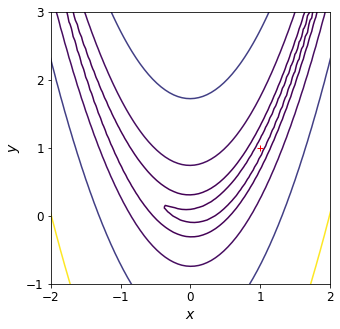

In [13]:
a = np.array([-5, -4])
b = np.array([-2, -2])
c = np.array([0, 2])
vertexs=np.vstack((a,b,c))
x0,fx0 = NelderMeadMethod_Recursive(RosenbrockFunction,vertexs)
print(x0,fx0)
plotRosenbrockFunction(x0,fx0)

[2.99997729 2.00016729] 4.188909269112864e-07


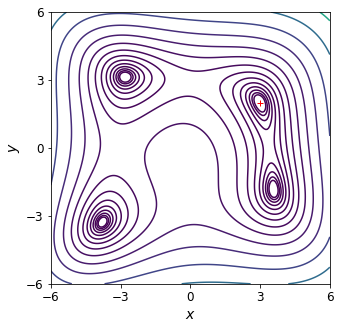

In [14]:
a = np.array([4, -1])
b = np.array([3, 3])
c = np.array([-5,5])
vertexs=np.vstack((a,b,c))
x0,fx0 = NelderMeadMethod_Recursive(HimmelblauFunction,vertexs)
print(x0,fx0)
plotHimmelblauFunction(x0,fx0)